### Implemente a support vector machine (SVM) for image classification.

In [3]:
# Install necessary libraries
!pip install scikit-learn
!pip install opencv-python

import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

In [48]:
# Load Dataset
def load_images(folder):
    images = []
    labels = []
    class_labels = {'cats': 0, 'dogs': 1}

    for class_name in class_labels.keys():
        class_folder = os.path.join(folder, class_name)
        for filename in os.listdir(class_folder):
            img_path = os.path.join(class_folder, filename)

            # Load the image and check if it's not empty
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (64, 64))  # Resize the image to a common size
                images.append(img.flatten())  # Flatten the image array
                labels.append(class_labels[class_name])  # Assign label 0 for cats, 1 for dogs

    return np.array(images), np.array(labels)

In [49]:
# Load and preprocess the dataset
data_folder = r'C:\Users\Ayesha\Desktop\ML_tasks\task2\dataset'
images, labels = load_images(data_folder)

In [50]:
# Check unique labels in the dataset
unique_labels = np.unique(labels)
print("Unique Labels in Dataset:", unique_labels)

Unique Labels in Dataset: [0 1]


In [51]:
if len(unique_labels) < 2:
    raise ValueError("The dataset should contain at least two classes.")

In [52]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [53]:
# Check unique labels in the training set
unique_labels_train = np.unique(y_train)
print("Unique Labels in Training Set:", unique_labels_train)

Unique Labels in Training Set: [0 1]


In [54]:
if len(unique_labels_train) < 2:
    raise ValueError("The training set should contain at least two classes.")

In [55]:
# Initialize SVM model
svm_model = SVC(kernel='linear', C=1.0)

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

In [56]:
# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 57.00%


In [57]:
# Check the shapes of y_test and y_pred
print("Shape of y_test:", y_test.shape)
print("Shape of y_pred:", y_pred.shape)

Shape of y_test: (400,)
Shape of y_pred: (400,)


In [61]:
# Check the shapes of y_test and y_pred
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1596, 12288) (400, 12288) (1596,) (400,)


In [58]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

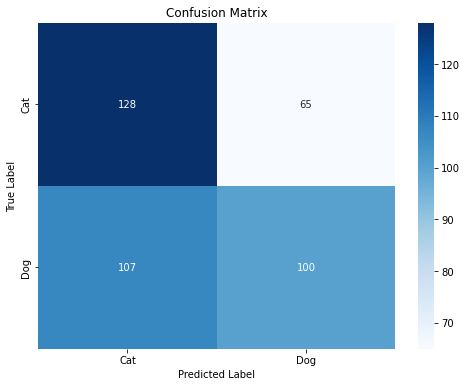

In [59]:

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()